# Day 9

## Cifar10 读取

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

In [2]:
transform = transforms.Compose([transforms.Resize(255),
                              transforms.RandomRotation(30),
                              transforms.RandomResizedCrop(224),
                              transforms.ToTensor(),
                              transforms.Normalize([0.485, 0.456, 0.406],
                                                  [0.229, 0.224, 0.225])])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


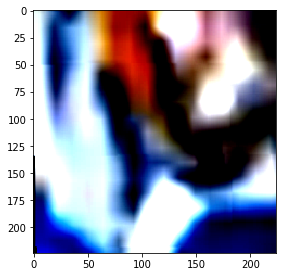

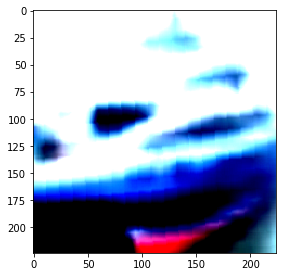

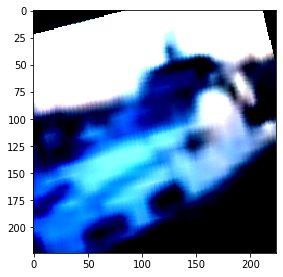

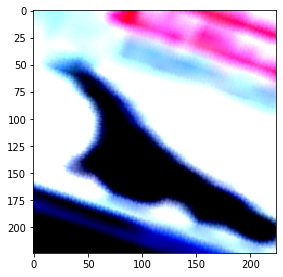

In [3]:
def net_sample_output():
    for i, sample in enumerate(testloader):
        images = sample[0].type(torch.FloatTensor)
        if i == 0:
            return images
        
images = net_sample_output()

def visualize_output(images, batch_size=4):
    for i in range(batch_size):
        plt.figure(figsize=(20,20))
        ax = plt.subplot(1, batch_size, i+1)
        image = images[i].data
        image = image.numpy()   
        image = np.transpose(image, (1, 2, 0))   
        ax.imshow(image)
    plt.show()
visualize_output(images)

## Data Augment

### 裁剪 (Crop)
#### 1. 随机裁剪
`transforms.RandomCrop(size, padding=None, pad_if_needed=False, fill=0, padding_mode='constant')`
- **size** : 输出尺寸
- **fill** : 恒定填充的像素填充值。默认值为0.如果长度为3的元组，则分别用于填充R，G，B通道。仅当padding_mode为常量时才使用此值
---
#### 2. 中心裁剪
`transforms.CenterCrop(size)`

---

####  3. 随机长宽比裁剪 
`transforms.RandomResizedCrop(size, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=2)`
- scale : 随机 crop 的大小区间，如 scale=(0.08, 1.0)，表示随机 crop 出来的图片会在的 0.08倍至 1 倍之间。
- ratio : 随机长宽比设置
- interpolation : 插值的方法，默认为双线性插值(PIL.Image.BILINEAR)
---
#### 4.上下左右中心裁剪
`.transforms.FiveCrop(size)`

*对图片进行上下左右以及中心裁剪，获得 5 张图片，返回一个 4D-tensor*

### 翻转和旋转 (Flip and Rotation)
#### 6. 依概率水平翻转
`transforms.RandomHorizontalFlip(p=0.5)`
- p : 概率，默认值为 0.5

#### 7. 依概率 p 垂直翻转 
`transforms.RandomVerticalFlip(p=0.5)`

---

#### 8. 随机旋转
`transforms.RandomRotation(degrees, resample=False, expand=False, center=None)`
- degress : 若为单个数，如 30，则表示在（-30，+30）之间随机旋转若为 sequence，如(30，60)，则表示在 30-60 度之间随机旋转

### 图像变换
#### 9. resize
`transforms.Resize(size, interpolation=2)`

---

#### 10. Normalize
` transforms.Normalize()`

**note** : *对数据按通道进行标准化，即先减均值，再除以标准差，注意是 h * w * c*

---
#### 11. Totensor
`transforms.ToTensor()`

**note** : *在这里会对数据进行 transpose，原来是 h * w * c，会经过 img = img.transpose(0,1).transpose(0, 2).contiguous()，变成 c * h * w 再除以 255,使得像素值归一化至[0-1]之间*

---
#### 12. 填充
`transforms.Pad(padding, fill=0, padding_mode='constant')`
#### 13. 修改亮度、对比度和饱和度
`transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0)`

**note** : *修改修改亮度、对比度和饱和度*

#### 14. 转灰度图
`transforms.Grayscale(num_output_channels=1)`

#### 15.依概率 p 转为灰度图
`transforms.RandomGrayscale(p=0.1)`

---

#### 16. 线性变换
`transforms.LinearTransformation(transformation_matrix)`

**note** : *对矩阵做线性变化，可用于白化处理*

---
#### 17. 仿射变换
`transforms.RandomAffine(degrees, translate=None, scale=None, shear=None, resample=False, fillcolor=0)`


### 对 transforms 操作，使数据增强更灵活
**``PyTorch 不仅可设置对图片的操作，还可以对这些操作进行随机选择、组合
``**

---
#### 20. transforms.RandomChoice(transforms)

**note** : *从给定的一系列 transforms 中选一个进行操作*

---
#### 21. transforms.RandomApply(transforms, p=0.5)

**note** : *给一个 transform 加上概率，以一定的概率执行该操作*

---

#### 22. transforms.RandomOrder

**note** : *将 transforms 中的操作顺序随机打乱*